Attempts to compute the output spiking frequency of a LIF neuron, driven by Poisson input

<table><tr><td>
    $\dot{V}(t) = -\frac{V}{\tau_V} + \Delta V_\mathrm{inp} S_\mathrm{inp}(t) - T S_\mathrm{out}(t) \\$
</td></tr></table>

where the input and output spike functions is given by
<table><tr><td>
    $\begin{eqnarray}
    S_\mathrm{inp}(t) &=& \sum_i \delta(t - t^\mathrm{inp}_i)\\
    S_\mathrm{out}(t) &=& \sum_i \delta(t - t^\mathrm{out}_i) = \delta(V - T)
    \end{eqnarray}$
</td></tr></table>

**Naive approach 1**: Compute time-average $\langle f(t) \rangle_{t} = \lim_{T \rightarrow \infty}\frac{1}{T} \int_0^T f(t)dt$. It can be noted that long-time average velocity of a bounded function should tend to zero. We get
<table><tr><td>
    $0 = -\frac{\bar{V}}{\tau_V} + \Delta V_\mathrm{inp} R_\mathrm{inp} - T R_\mathrm{out}$
</td></tr></table>
Unfortunately, $\bar{V}$ is a tricky quantity to estimate. It can be empirically observed that $\bar{V} = \alpha T$, where $\alpha \in [0, 0.5]$. Rearranging, and defining $\beta = \frac{\Delta V_\mathrm{inp}}{T}$ as the ratio of input spike increments to threshold, we get
<table><tr><td>
    $R_\mathrm{out} = \beta R_\mathrm{inp} - \frac{\alpha}{\tau_V}$
</td></tr></table>
Problem is that $\alpha = \alpha(R_\mathrm{inp}, \beta, \tau_V)$. In case that the first term dominates (large input frequency, large number of input per spike, large decay timescales), the 2nd term can be ignored, simply translating input rate to output rate linearly. However, in real neurons, the terms are very much comparable.


<IPython.core.display.Javascript object>


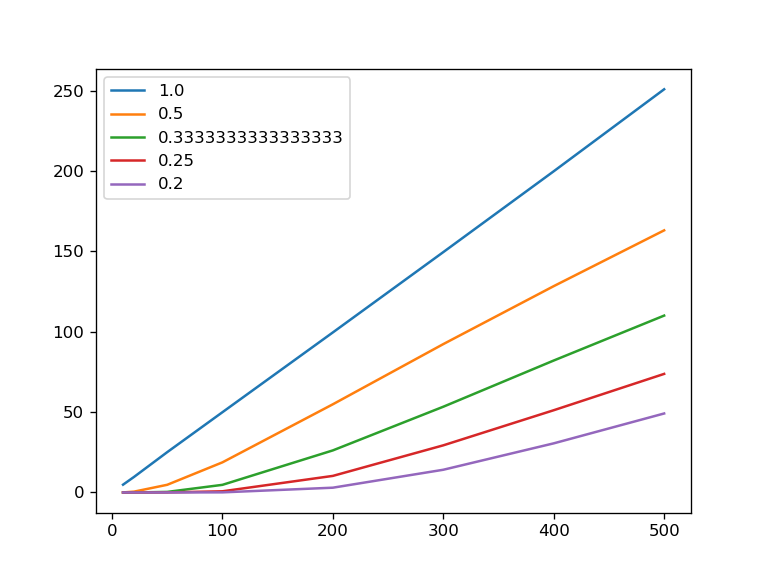

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T = 1
DVlst = T * np.array([1, 1/2, 1/3, 1/4, 1/5])
dt = 0.1 / 1000
tau = 10 / 1000
time_run = 200
NT = int(time_run / dt)
INP_R = np.array([10, 20,  50, 100, 200, 300, 400, 500])


plt.figure()

for DV in DVlst:
    V = 0
    count = np.zeros(len(INP_R))
    for iCount in range(len(INP_R)):
        VBar = 0
        randomPoisson = (np.random.uniform(0, 1, NT) < INP_R[iCount] * dt).astype(int)
        for i in range(NT):
            V = V*(1 - dt/tau) + DV * randomPoisson[i]
            VBar += V
            if V > T:
                V = 0
                count[iCount] += 1

    plt.plot(INP_R, count / time_run, label=str(DV))
plt.legend()
plt.show()

DV= 6.5
DV= 3.25
DV= 1.3
DV= 0.65
DV= 0.325
DV= 0.21666666666666667
DV= 0.1625
DV= 0.13
DV= 0.065
DV= 0.013


<IPython.core.display.Javascript object>


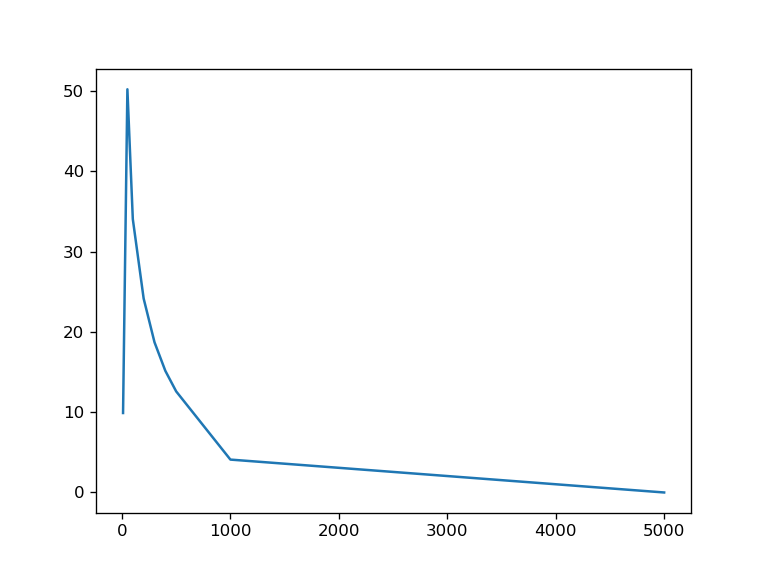

In [15]:
T = 1
dt = 0.1 / 1000
tau = 10 / 1000
time_run = 200
NT = int(time_run / dt)
INP_R = np.array([10, 20,  50, 100, 200, 300, 400, 500, 1000, 5000])
V = 0

TARGET_RATE = 15

count = np.zeros(len(INP_R))
for iCount in range(len(INP_R)):
    DV = (TARGET_RATE + 1/(2*tau))*T / INP_R[iCount]
    print("DV=", DV)
    randomPoisson = (np.random.uniform(0, 1, NT) < INP_R[iCount] * dt).astype(int)
    for i in range(NT):
        V = V*(1 - dt/tau) + DV * randomPoisson[i]
        if V > T:
            V = 0
            count[iCount] += 1

plt.figure()
plt.plot(INP_R, count / time_run)
plt.show()